<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.3 확률적 경사 하강법(생선 다중 분류)

In [12]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,
fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

sc.partial_fit(train_scaled, train_target)
#sc.partial_fit(train_scaled, train_target)
#sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.7983193277310925
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


    /usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.warnings.warn(
    
해당 오류의 의미:   
    
SGDClassifier는 경사 하강법(gradient descent)으로 손실(loss)을 점점 줄여나가는데,
지금 설정한 max_iter=10 (즉 10번 반복)은 너무 적어서 손실이 아직 충분히 줄지 않은 상태

점진적학습 (sc.partial_fit)을 1씩 증가 시키면서

코드: sc.partial_fit(train_scaled, train_target)

• 한번 할 때마다 1 에포크 증가

•  모델을 초기화하지 않고, 이전 학습 내용을 유지하면서 점진적으로 학습

• partial_fit()을 여러 번 호출하면, 매번 조금씩 가중치를 업데이트

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.773109243697479
0.775
0.7983193277310925
0.775


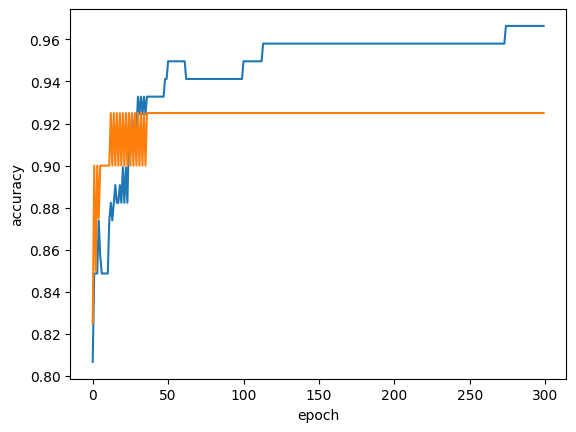

In [15]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,
fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10, random_state=42)    #max_iter=10은 너무 적어서 수렴이 안 됨
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

sc.partial_fit(train_scaled, train_target)
#sc.partial_fit(train_scaled, train_target)
#sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

import numpy as np
train_score = []
test_score = []
classes = np.unique(train_target)
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,
fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=100, tol=None, random_state=42)    #tol = None은 최소 지정한 100번은 완료하라는 옵션
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

# sc.partial_fit(train_scaled, train_target)
# #sc.partial_fit(train_scaled, train_target)
# #sc.partial_fit(train_scaled, train_target)
# print(sc.score(train_scaled, train_target))
# print(sc.score(test_scaled, test_target))

# import numpy as np
# train_score = []
# test_score = []
# classes = np.unique(train_target)
# for _ in range(0, 300):
#   sc.partial_fit(train_scaled, train_target, classes=classes)
#   train_score.append(sc.score(train_scaled, train_target))
#   test_score.append(sc.score(test_scaled, test_target))

# import matplotlib.pyplot as plt
# plt.plot(train_score, label = 'train')
# plt.plot(test_score, label = 'test')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.show()

0.957983193277311
0.925


| 단계        | 설명                              |
| --------- | ------------------------------- |
| 1. 데이터 로드 | 물고기 데이터 불러오기                    |
| 2. 분리     | 입력(X), 타깃(y) 분리                 |
| 3. 분할     | train/test 나누기                  |
| 4. 스케일링   | 평균 0, 표준편차 1로 정규화               |
| 5. 모델 정의  | SGDClassifier(확률적 경사 하강 기반 분류기) |
| 6. 학습     | 훈련 데이터로 100번 반복 학습              |
| 7. 평가     | 훈련셋과 테스트셋 정확도 출력                |


##오차와 손실함수

| 항목      | 오차        | 손실함수      |
| ------- | --------- | --------- |
| **대상**  | 개별 예측     | 전체 모델     |
| **형태**  | 단순 수치     | 수학적 함수    |
| **역할**  | 예측 정확도 확인 | 모델 학습 최적화 |
| **사용처** | 결과 해석     | 역전파 및 학습  |

